# Matplotlib for Climate Scientists & Meteorologists


Agenda
- Learn the basics of the Matplotlib library.
- Understand how to create various types of plots (line, bar, histogram, scatter, heatmap).
- Customize plots with titles, labels, legends, and styles.
- Save plots as image files (PNG, PDF, SVG, EPS, and PGF).

Introduction to Matplotlib
- Matplotlib is a Python 2D/3D plotting library which produces scientific and publication-quality figures.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Check matplotlib version
from importlib.metadata import version
print(version('matplotlib'))

3.10.7


In [13]:
# Set working directory 

import os
os.chdir("c:\\Users\\yonas\\Documents\\ICPAC\\python-climate")

processed_data_dir = os.path.join("data", "processed")
raw_data_dir = os.path.join("data", "raw")

## Synthetic Climate Dataset

In [ ]:
rng = np.random.default_rng(7)
stations = [("ADD","Addis Ababa",9.03,38.74),
            ("NBO","Nairobi",-1.29,36.82),
            ("MOG","Mogadishu",2.05,45.32)]
dates = pd.date_range("2020-01-01","2020-12-31",freq="D")
doy = dates.dayofyear.values

def synth_station(lat):
    season = 6*np.sin(2*np.pi*(doy-1)/365.0)
    lat_grad = 0.2*(10-lat)
    t = 24 + season + lat_grad + rng.normal(0,1.2,len(dates))
    rain = rng.gamma(1.3, np.clip(2 + 2*np.sin(2*np.pi*(doy-30)/365.0) + 1.3*np.sin(4*np.pi*(doy-30)/365.0),0.2,None), len(dates))
    rain = np.maximum(rain-2.0, 0.0)
    return t, rain

rows = []
for sid,name,lat,lon in stations:
    t, p = synth_station(lat)
    rows.append(pd.DataFrame({"date":dates,"station_id":sid,"name":name,"lat":lat,"lon":lon,"t2m_c":t,"precip_mm":p}))
df = pd.concat(rows, ignore_index=True).set_index("date").sort_index()

# Grid for maps/Hovmöller
lat = np.arange(-10,16,1.0)
lon = np.arange(30,51,1.0)
time = np.arange(366)
seasonal = 5*np.sin(2*np.pi*time/365.0)[:,None,None]
lat_grad = (24.0 - 0.25*lat)[None,:,None]
noise = rng.normal(0.0,0.7,size=(time.size,lat.size,lon.size))
t2m_grid = 24.0 + seasonal + lat_grad + noise


In [22]:
t2m_grid.shape

(366, 26, 21)

## Basics: Figure, Axes, Line Plot

In [23]:
domain_mean = t2m_grid.mean(axis=(1,2))
domain_mean.shape

(366,)

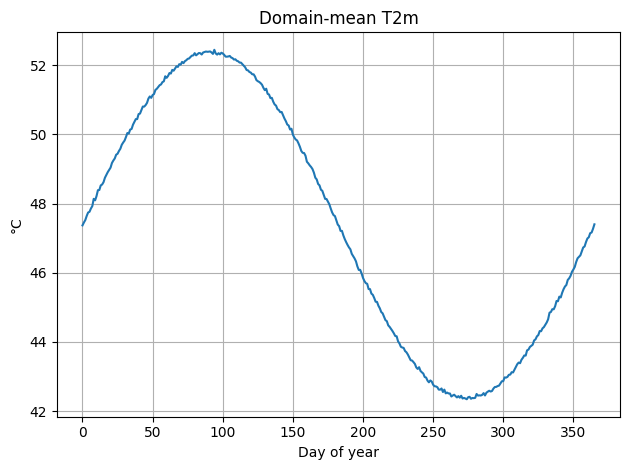

In [ ]:
plt.figure() # Create a new figure
plt.plot(domain_mean) # Plot the domain-mean T2m
plt.title("Domain-mean T2m") # Add a title
plt.xlabel("Day of year") # Label x-axis
plt.ylabel("°C") # Label y-axis
plt.grid(True) # Add a grid
plt.tight_layout() # Adjust layout
plt.show() # Show the plot

## Line Plots (Time Series)

In [27]:
add = df[df["station_id"]=="ADD"]["t2m_c"] # Extract Addis Ababa T2m
add

date
2020-01-01    24.195476
2020-01-02    24.655775
2020-01-03    24.071564
2020-01-04    23.435008
2020-01-05    24.061210
                ...    
2020-12-27    26.026236
2020-12-28    24.594649
2020-12-29    24.054443
2020-12-30    22.067378
2020-12-31    24.659549
Name: t2m_c, Length: 366, dtype: float64

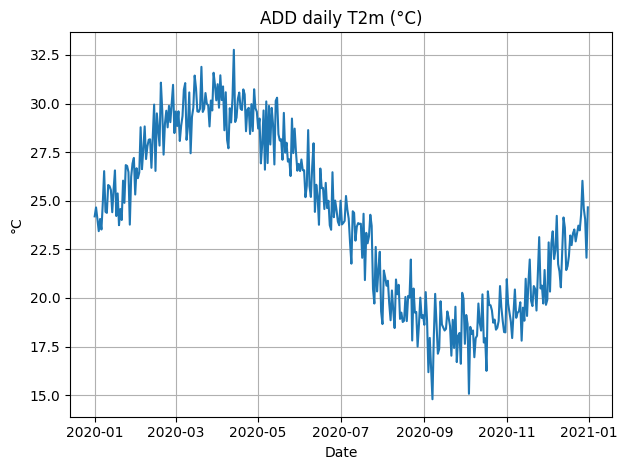

In [28]:
plt.figure() # Create a new figure
plt.plot(add.index, add.values) # Plot time series
plt.title("ADD daily T2m (°C)") # Add title
plt.xlabel("Date") # Label x-axis
plt.ylabel("°C") # Label y-axis
plt.grid(True) # Add grid 
plt.tight_layout() # Adjust layout 
plt.show() # Show the plot

## Rolling mean


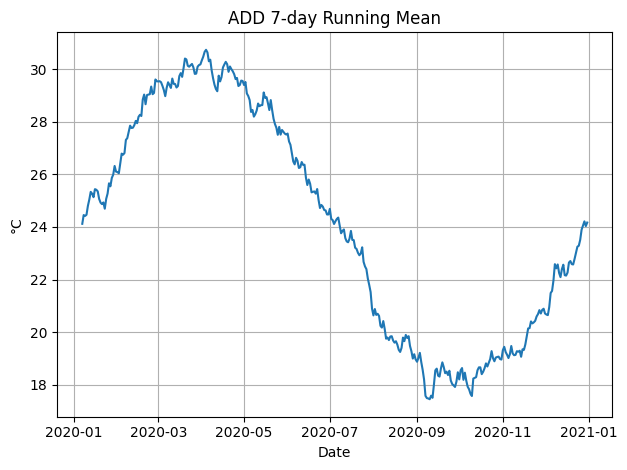

In [30]:
plt.figure() # Create a new figure
plt.plot(add.index, add.rolling(7).mean()) # Plot 7-day running mean
plt.title("ADD 7-day Running Mean") # Add title
plt.xlabel("Date") # Add x-label
plt.ylabel("°C") # Add y-label
plt.grid(True) # Add grid
plt.tight_layout() # Adjust layout
plt.show() # Show the plot

## Scatter Plot

In [31]:
df

,station_id,name,lat,lon,t2m_c,precip_mm
date,,,,,,
2020-01-01,ADD,Addis Ababa,9.03,38.74,24.195476,0.0
2020-01-01,MOG,Mogadishu,2.05,45.32,23.299703,0.0
2020-01-01,NBO,Nairobi,-1.29,36.82,26.105206,0.0
2020-01-02,ADD,Addis Ababa,9.03,38.74,24.655775,0.0
2020-01-02,MOG,Mogadishu,2.05,45.32,25.503162,0.0
...,...,...,...,...,...,...
2020-12-30,ADD,Addis Ababa,9.03,38.74,22.067378,0.0
2020-12-30,NBO,Nairobi,-1.29,36.82,25.066196,0.0
2020-12-31,NBO,Nairobi,-1.29,36.82,26.596805,0.0


In [32]:
nbo = df[df["station_id"]=="NBO"] # Extract Nairobi station data
nbo

,station_id,name,lat,lon,t2m_c,precip_mm
date,,,,,,
2020-01-01,NBO,Nairobi,-1.29,36.82,26.105206,0.0
2020-01-02,NBO,Nairobi,-1.29,36.82,25.991913,0.0
2020-01-03,NBO,Nairobi,-1.29,36.82,27.375470,0.0
2020-01-04,NBO,Nairobi,-1.29,36.82,25.266630,0.0
2020-01-05,NBO,Nairobi,-1.29,36.82,28.279682,0.0
...,...,...,...,...,...,...
2020-12-27,NBO,Nairobi,-1.29,36.82,26.749515,0.0
2020-12-28,NBO,Nairobi,-1.29,36.82,26.731095,0.0
2020-12-29,NBO,Nairobi,-1.29,36.82,25.358559,0.0


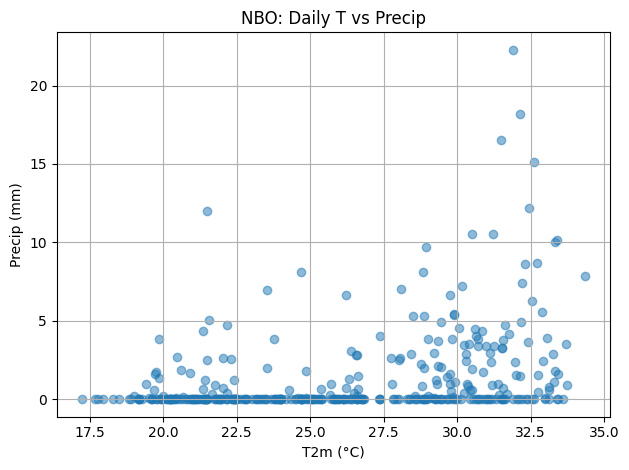

In [33]:
plt.figure() # Create a new figure
plt.scatter(nbo["t2m_c"], nbo["precip_mm"], alpha=0.5) # Scatter plot
plt.title("NBO: Daily T vs Precip") # Add title
plt.xlabel("T2m (°C)") # Add x-label
plt.ylabel("Precip (mm)") # Add y-label 
plt.grid(True) # Add grid 
plt.tight_layout() # Adjust layout 
plt.show() # Show the plot 

## Histogram

In [35]:
nbo_precip = df[df["station_id"]=="NBO"]["precip_mm"] # Extract Nairobi precip
nbo_precip

date
2020-01-01    0.0
2020-01-02    0.0
2020-01-03    0.0
2020-01-04    0.0
2020-01-05    0.0
             ... 
2020-12-27    0.0
2020-12-28    0.0
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
Name: precip_mm, Length: 366, dtype: float64

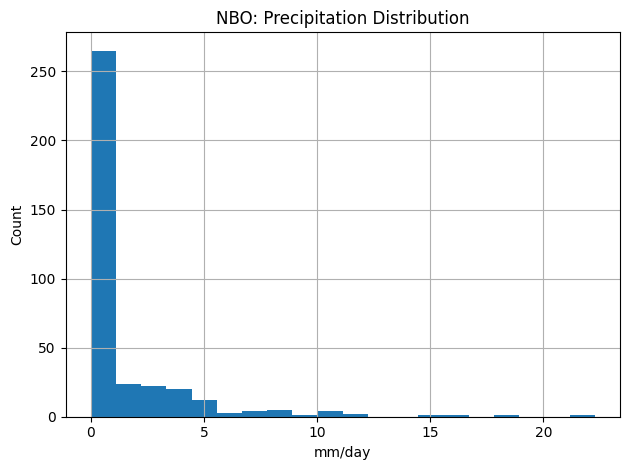

In [ ]:
plt.figure() # Create a new figure
plt.hist(nbo_precip, bins=20) # Histogram of precip data 
plt.title("NBO: Precipitation Distribution") # Add title
plt.xlabel("mm/day") # Add x-label
plt.ylabel("Count") # Add y-lable
plt.grid(True) # Add grid 
plt.tight_layout() # Adjust layout 
plt.show() # Show the plot

## Bar Charts

In [39]:
monthly = (df.groupby(["station_id", pd.Grouper(freq="MS")])
             .agg(t2m_c_mean=("t2m_c","mean"), precip_mm_sum=("precip_mm","sum"))
             .reset_index())
monthly.head()

,station_id,date,t2m_c_mean,precip_mm_sum
0,ADD,2020-01-01,25.167938,18.492305
1,ADD,2020-02-01,28.404934,34.949877
2,ADD,2020-03-01,29.814355,57.472656
3,ADD,2020-04-01,29.834072,93.142862
4,ADD,2020-05-01,28.173009,100.644649


In [40]:
mon_add = monthly[monthly["station_id"]=="ADD"] # Extract Addis Ababa monthly data
mon_add.head()

,station_id,date,t2m_c_mean,precip_mm_sum
0,ADD,2020-01-01,25.167938,18.492305
1,ADD,2020-02-01,28.404934,34.949877
2,ADD,2020-03-01,29.814355,57.472656
3,ADD,2020-04-01,29.834072,93.142862
4,ADD,2020-05-01,28.173009,100.644649


### Vertical Bar Chart

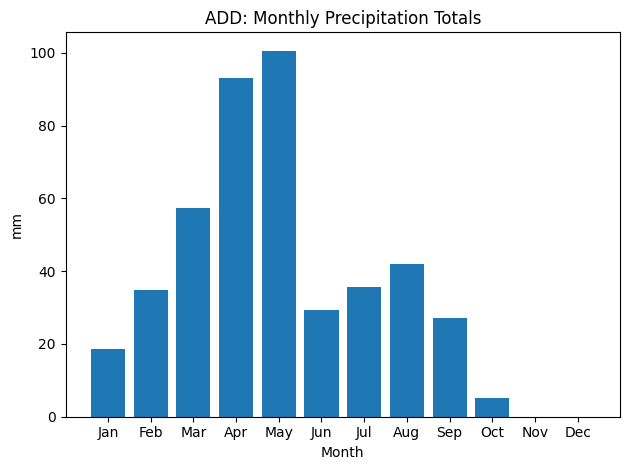

In [42]:
plt.figure() # Create a new figure
plt.bar(mon_add["date"].dt.strftime("%b"), mon_add["precip_mm_sum"].values) # Bar plot
plt.title("ADD: Monthly Precipitation Totals") # Add title
plt.xlabel("Month") # Add x-label
plt.ylabel("mm") # Add y-label
plt.tight_layout() # Adjust layout
plt.show() # Show the plot


### Horizontal Bar Chart

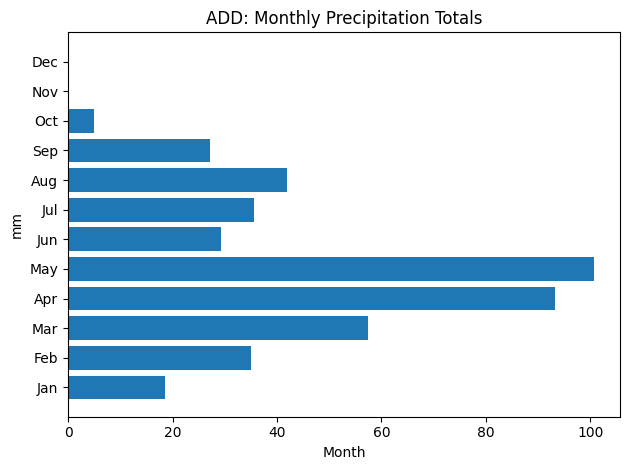

In [68]:
plt.figure() # Create a new figure
plt.barh(mon_add["date"].dt.strftime("%b"), mon_add["precip_mm_sum"].values) # Bar plot
plt.title("ADD: Monthly Precipitation Totals") # Add title
plt.xlabel("Month") # Add x-label
plt.ylabel("mm") # Add y-label
plt.tight_layout() # Adjust layout
plt.show() # Show the plot


## Box Plot

In [ ]:
add_df = df[df["station_id"]=="ADD"].copy() # Extract Addis Ababa data
add_df.head()

,station_id,name,lat,lon,t2m_c,precip_mm
date,,,,,,
2020-01-01,ADD,Addis Ababa,9.03,38.74,24.195476,0.0
2020-01-02,ADD,Addis Ababa,9.03,38.74,24.655775,0.0
2020-01-03,ADD,Addis Ababa,9.03,38.74,24.071564,0.0
2020-01-04,ADD,Addis Ababa,9.03,38.74,23.435008,0.0
2020-01-05,ADD,Addis Ababa,9.03,38.74,24.061210,0.0


In [ ]:
add_df["month"] = add_df.index.month # Add month column
add_df.head()


,station_id,name,lat,lon,t2m_c,precip_mm,month
date,,,,,,,
2020-01-01,ADD,Addis Ababa,9.03,38.74,24.195476,0.0,1
2020-01-02,ADD,Addis Ababa,9.03,38.74,24.655775,0.0,1
2020-01-03,ADD,Addis Ababa,9.03,38.74,24.071564,0.0,1
2020-01-04,ADD,Addis Ababa,9.03,38.74,23.435008,0.0,1
2020-01-05,ADD,Addis Ababa,9.03,38.74,24.061210,0.0,1


In [47]:
add_df.tail()


,station_id,name,lat,lon,t2m_c,precip_mm,month
date,,,,,,,
2020-12-27,ADD,Addis Ababa,9.03,38.74,26.026236,0.0,12
2020-12-28,ADD,Addis Ababa,9.03,38.74,24.594649,0.0,12
2020-12-29,ADD,Addis Ababa,9.03,38.74,24.054443,0.0,12
2020-12-30,ADD,Addis Ababa,9.03,38.74,22.067378,0.0,12
2020-12-31,ADD,Addis Ababa,9.03,38.74,24.659549,0.0,12


In [ ]:
data = [add_df.loc[add_df["month"]==m, "t2m_c"].values for m in range(1,13)] 
data # extracted data for each month 

[array([24.19547618, 24.65577478, 24.07156424, 23.4350078 , 24.06120962,
        23.51981293, 24.88478251, 26.52350656, 24.42702481, 24.37528304,
        25.80956933, 25.75162467, 25.5511241 , 24.40896742, 25.59093441,
        26.5604836 , 24.21269149, 25.37575568, 23.74206006, 24.57417268,
        24.00905535, 26.03394738, 24.89141148, 26.83349767, 26.79102924,
        26.47284448, 23.7705419 , 26.23694458, 26.91710049, 27.20237382,
        25.32049038]),
 array([26.67272173, 26.16027075, 26.45142634, 28.78169023, 26.62516893,
        27.63977559, 28.82362796, 27.1445407 , 27.79223815, 28.13915078,
        28.1623155 , 26.69374072, 28.33202999, 29.94690471, 26.53417635,
        29.49519896, 28.67908906, 27.83673766, 31.07633238, 29.65854651,
        27.37134228, 28.96519458, 29.63170144, 28.77562798, 29.88272667,
        29.04303854, 29.98172083, 30.96393754, 28.48210785]),
 array([29.59035008, 28.84276904, 29.60207232, 28.07377163, 28.85072616,
        29.35635005, 30.71459952, 31.05

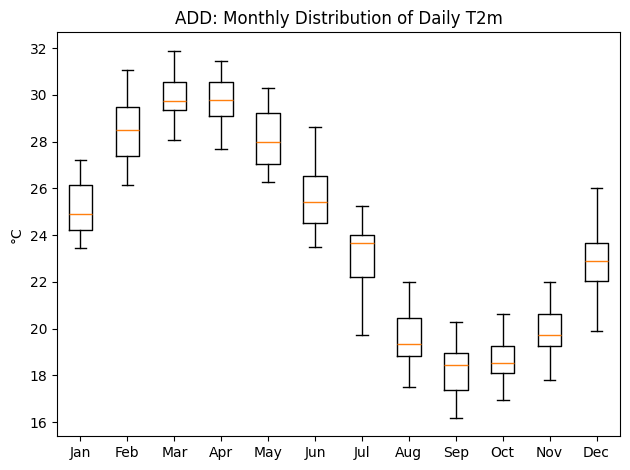

In [50]:
plt.figure() # Create a new figure
plt.boxplot(data, tick_labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], showfliers=False) # Boxplot 
plt.title("ADD: Monthly Distribution of Daily T2m") # Add title 
plt.ylabel("°C") # Add y-label 
plt.tight_layout() # Adjust layout
plt.show() # Show the plot 

## Heatmaps (Hovmöller and Map)

In [51]:
# Hovmöller time-lat (mean over lon)
time_lat = t2m_grid.mean(axis=2) 
time_lat.shape

(366, 26)

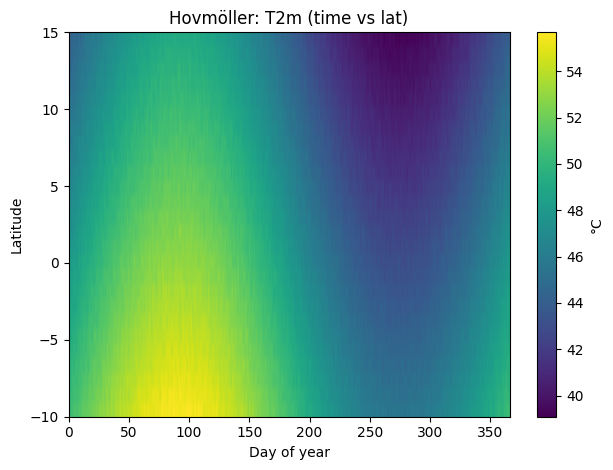

In [53]:
plt.figure() # Create a new figure
plt.imshow(time_lat.T,  # Transpose the data for correct orientation
           aspect="auto", # Maintain aspect ratio
           origin="lower", # Set the origin to the lower left corner
           extent=[0, time_lat.shape[0], lat.min(), lat.max()]) # Set the extent

plt.title("Hovmöller: T2m (time vs lat)") # Add title
plt.xlabel("Day of year") # Add x-label
plt.ylabel("Latitude") # Add y-label
plt.colorbar(label="°C") # Add colorbar
plt.tight_layout() # Adjust layout
plt.show() # Show the plot

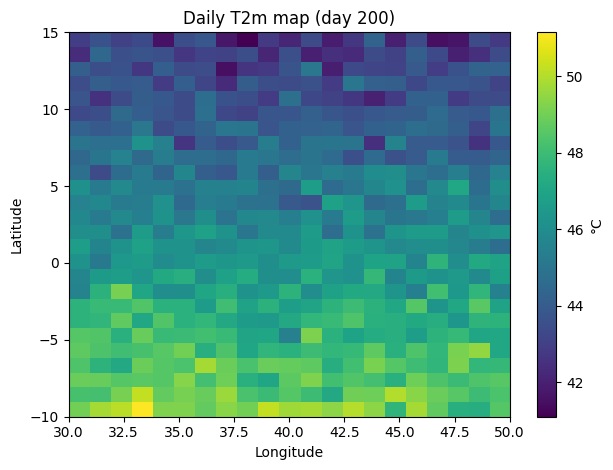

In [54]:
# Single-day map
d = 200
plt.figure() # Create a new figure
plt.imshow(t2m_grid[d],  # Data for day d
           origin="lower",  # Set origin to lower left corner
           extent=[lon.min(), lon.max(), lat.min(), lat.max()],  # Set extent
           aspect="auto")
plt.title(f"Daily T2m map (day {d})") # Add title
plt.xlabel("Longitude") # Add x-label
plt.ylabel("Latitude") # Add y-label
plt.colorbar(label="°C") # Add colorbar
plt.tight_layout() # Adjust layout
plt.show() # Show the plot


## Dual Axes (Temperature vs Precip)

In [55]:
add_mon = monthly[monthly["station_id"]=="ADD"].set_index("date") # Extract Addis Ababa monthly data
add_mon.head()

,station_id,t2m_c_mean,precip_mm_sum
date,,,
2020-01-01,ADD,25.167938,18.492305
2020-02-01,ADD,28.404934,34.949877
2020-03-01,ADD,29.814355,57.472656
2020-04-01,ADD,29.834072,93.142862
2020-05-01,ADD,28.173009,100.644649


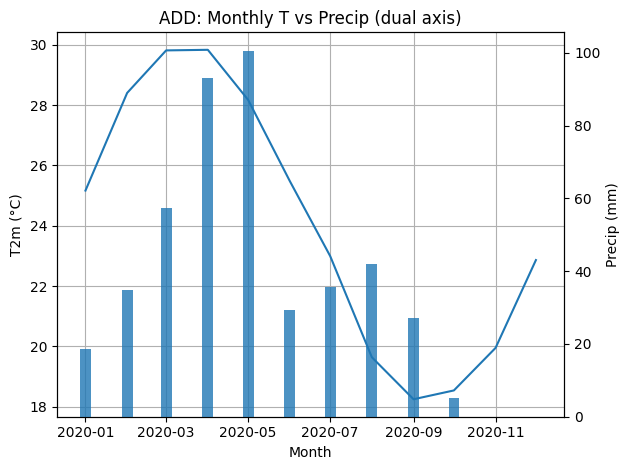

In [62]:
plt.figure() # Create a new figure

ax1 = plt.gca() # Get current axes 
ax1.plot(add_mon.index, add_mon["t2m_c_mean"]) # Plot T2m mean 
ax1.set_xlabel("Month") # Set x-label 
ax1.set_ylabel("T2m (°C)") # Set y-label 
ax1.grid(True) # Add grid

ax2 = ax1.twinx() # Create a twin Axes sharing the x-axis
ax2.bar(add_mon.index, add_mon["precip_mm_sum"], alpha=0.8, width=8.0) # Bar plot for precip
ax2.set_ylabel("Precip (mm)") # Set y-label for precip
plt.title("ADD: Monthly T vs Precip (dual axis)") # Add title
plt.tight_layout() # Adjust layout
plt.show() # Show the plot

## Styling & Customization

In [64]:
series = df[df["station_id"]=="NBO"]["t2m_c"].rolling(7).mean() # 7-day rolling mean 
series

date
2020-01-01          NaN
2020-01-02          NaN
2020-01-03          NaN
2020-01-04          NaN
2020-01-05          NaN
                ...    
2020-12-27    25.336285
2020-12-28    25.459719
2020-12-29    25.474082
2020-12-30    25.600557
2020-12-31    25.811693
Name: t2m_c, Length: 366, dtype: float64

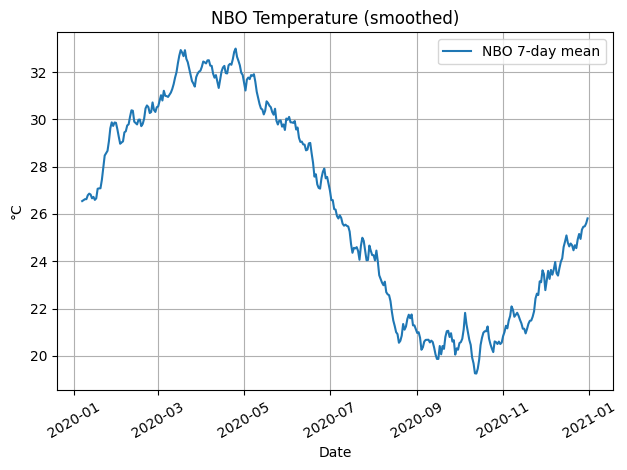

In [65]:
plt.figure() # Create a new figure
plt.plot(series.index, series.values, label="NBO 7-day mean") # Plot the series
plt.title("NBO Temperature (smoothed)") # Add title
plt.xlabel("Date") # Add x-label
plt.ylabel("°C") # Add y-label 
plt.grid(True) # Add grid
plt.legend() # Add legend
plt.xticks(rotation=30) # Rotate x-ticks
plt.tight_layout() # Adjust layout
plt.show() # Show plot

### Subplots/panel Plot 

### Basic grid of subplots 

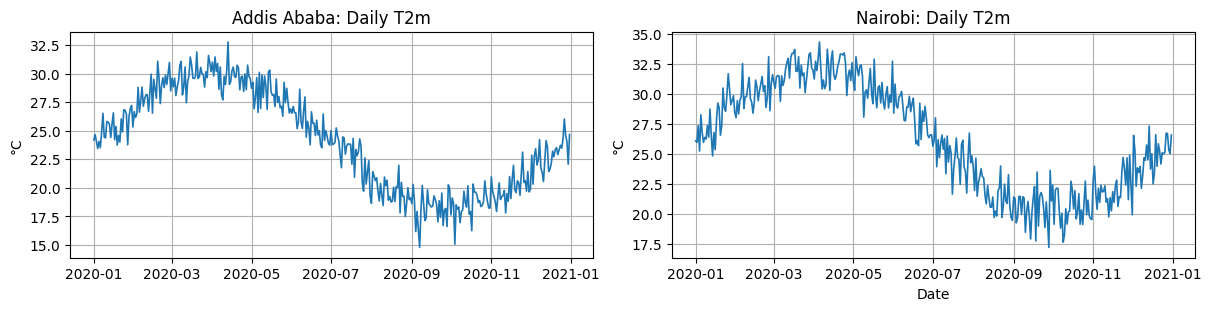

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, # Create subplots 
                         figsize=(12, 3),  # Set figure size
                         sharex=True,  # Share x-axis
                         constrained_layout=True) # Constrained layout 

for ax, sid, title in zip(axes, ["ADD","NBO"], ["Addis Ababa","Nairobi"]): # Loop over axes and stations 
    s = df[df["station_id"]==sid]["t2m_c"] # Extract station T2m 
    ax.plot(s.index, s.values, linewidth=1.2) # Plot T2m
    ax.set_title(f"{title}: Daily T2m") # Set title 
    ax.set_ylabel("°C") # Set y-label
    ax.grid(True) # Add grid

axes[1].set_xlabel("Date") # Set x-label for the last subplot 
plt.show() # Show the plot

### Mixed 2×2 panel: line, histogram, scatter, monthly bars

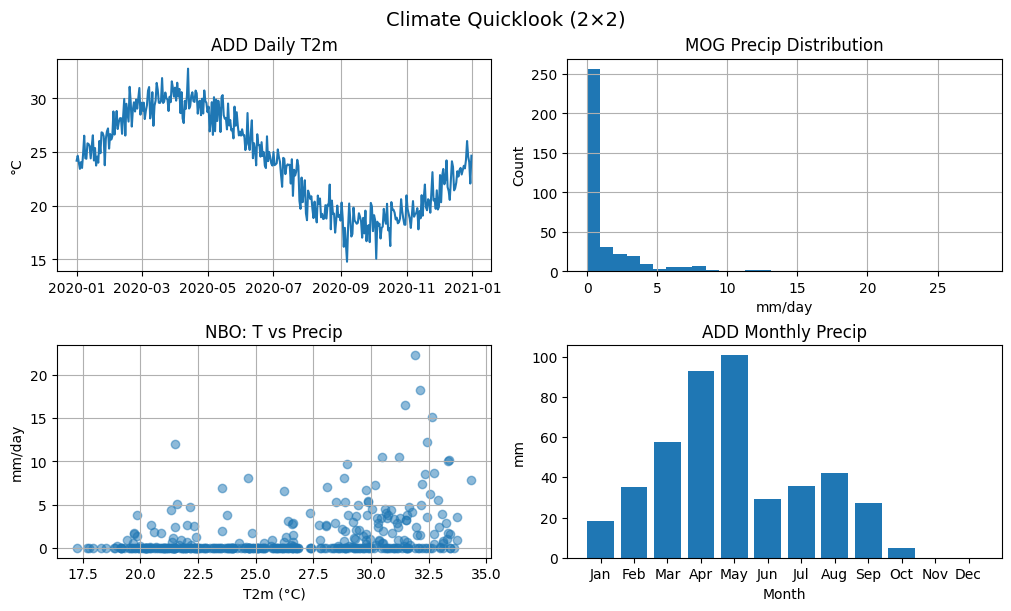

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

# (1,1) Line: ADD daily T
add = df[df["station_id"]=="ADD"]["t2m_c"]
axes[0,0].plot(add.index, add.values)
axes[0,0].set_title("ADD Daily T2m")
axes[0,0].set_ylabel("°C")
axes[0,0].grid(True)

# (1,2) Histogram: MOG precip
mog_pr = df[df["station_id"]=="MOG"]["precip_mm"]
axes[0,1].hist(mog_pr, bins=30)
axes[0,1].set_title("MOG Precip Distribution")
axes[0,1].set_xlabel("mm/day")
axes[0,1].set_ylabel("Count")
axes[0,1].grid(True)

# (2,1) Scatter: NBO T vs precip
nbo = df[df["station_id"]=="NBO"]
axes[1,0].scatter(nbo["t2m_c"], nbo["precip_mm"], alpha=0.5)
axes[1,0].set_title("NBO: T vs Precip")
axes[1,0].set_xlabel("T2m (°C)")
axes[1,0].set_ylabel("mm/day")
axes[1,0].grid(True)

# (2,2) Monthly bars: ADD precip
mon_add = monthly[monthly["station_id"]=="ADD"]
axes[1,1].bar(mon_add["date"].dt.strftime("%b"), mon_add["precip_mm_sum"].values)
axes[1,1].set_title("ADD Monthly Precip")
axes[1,1].set_xlabel("Month")
axes[1,1].set_ylabel("mm")

fig.suptitle("Climate Quicklook (2×2)", fontsize=14)
plt.show()


# Stacked layout with GridSpec

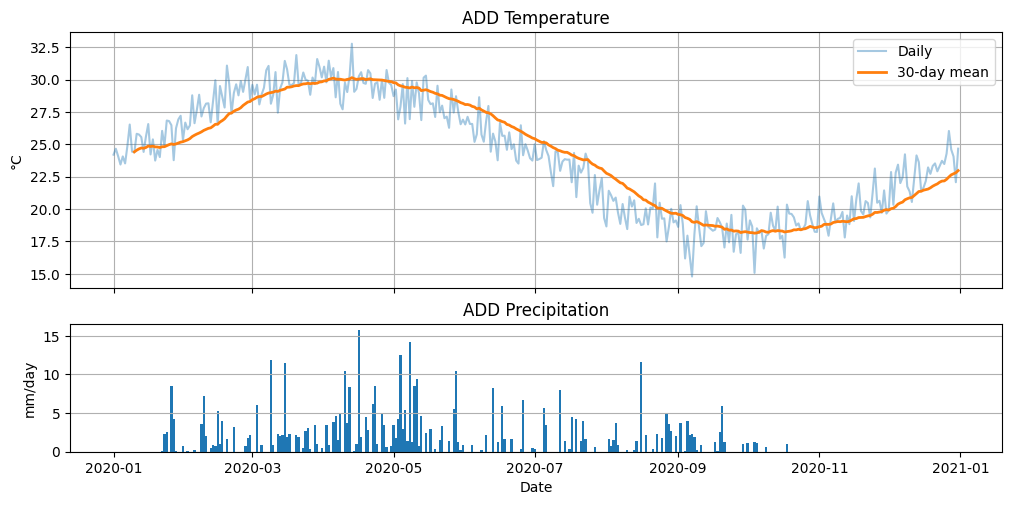

In [ ]:
from matplotlib.gridspec import GridSpec # Import GridSpec 

add = df[df["station_id"]=="ADD"]

fig = plt.figure(figsize=(10, 5), 
                 constrained_layout=True)

gs = GridSpec(nrows=3, ncols=1, height_ratios=[2, 1, 0.05], figure=fig)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0], 
                      sharex=ax1)

# Top: daily T and 30-day running mean
ax1.plot(add.index, add["t2m_c"], alpha=0.4, label="Daily")
ax1.plot(add.index, add["t2m_c"].rolling(30).mean(), linewidth=2, label="30-day mean")
ax1.set_title("ADD Temperature")
ax1.set_ylabel("°C")
ax1.grid(True)
ax1.legend(loc="upper right")

# Bottom: daily precip bars
ax2.bar(add.index, add["precip_mm"], width=1.0)
ax2.set_title("ADD Precipitation")
ax2.set_ylabel("mm/day")
ax2.set_xlabel("Date")
ax2.grid(True, axis="y")

plt.setp(ax1.get_xticklabels(), visible=False)  # keep top clean
plt.show()


## Saving Figures

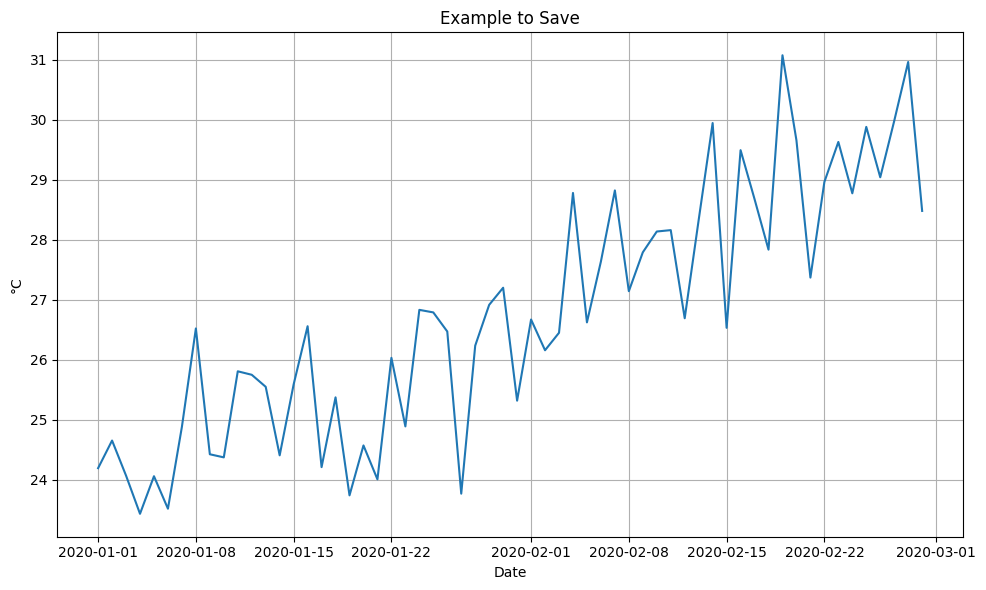

In [67]:
plt.figure(figsize=(10, 6)) # Create a new figure
plt.plot(add.index[:60], add.values[:60]) # Plot first 60 days 
plt.title("Example to Save") # Add title
plt.xlabel("Date") # Add x-label
plt.ylabel("°C") # Add y-label 
plt.grid(True) # Add grid
plt.savefig("data/processed/example_plot.png", dpi=300, bbox_inches="tight") # Save as PNG
plt.savefig("data/processed/example_plot.pdf", dpi=300, bbox_inches="tight") # Save as PDF
plt.savefig("data/processed/example_plot.svg", dpi=300, bbox_inches="tight") # Save as SVG
plt.savefig("data/processed/example_plot.eps", dpi=300, bbox_inches="tight") # Save as EPS
plt.tight_layout() # Adjust layout
plt.show() # Show plot



## Exercises
1) Plot daily temperature for each station and overlay a 30-day running mean (separate figures).  
2) Bar chart monthly precipitation for Nairobi; annotate the top-3 wettest months.  
3) Histogram of Addis daily precipitation; boxplot of Mogadishu monthly temperature.  
4) Hovmöller of temperature *anomalies* (subtract lat-time mean); add colorbar.  
5) Dual axis: monthly temperature vs precipitation for Mogadishu.  
6) Save one plot as PNG and PDF at dpi=300 with tight bounding box.  
7) Increase font sizes via `plt.rcParams.update({...})` and remake one figure.
